In [1]:
import numpy as np
import pandas as pd
import time as t
import corner 
from numpy.linalg import inv
from sklearn import preprocessing
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from scipy import special as sp
import MC as mc

The computation is being carried out by the "mhmc.py" script, computing an arbitrary number (usually the number of cpu cores available) of chains at a time. The chains will be saved in .gz files, loaded and plotted with this main script.

In [384]:
Beta_4_mat = []
for i in range(6):
    Beta_4_mat.append(np.loadtxt('mhmc'+str(i)+'.gz')[:,4])
Beta_4_mat=np.transpose(Beta_4_mat)

In [366]:
Beta_5_mat = []
for i in range(6):
    Beta_5_mat.append(np.loadtxt('mhmc'+str(i)+'.gz')[:,5])
Beta_5_mat=np.transpose(Beta_5_mat)

In [417]:
Ls = np.arange(0, 5000, 1)
Rs4 = mc.Gelman_Rubin(Beta_4_mat, Ls, 5000)
Rs5 = mc.Gelman_Rubin(Beta_5_mat, Ls, 5000)

C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Leo\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-413-ff43f607ba3d>:70: RuntimeWarning: divide by zero encountered in long_scalars
  Rs.append(((L-1)/L*W + B/L)/W)
<ipython-input-413-ff43f607ba3d>:70: RuntimeWarning: divide by zero encountered in double_sca

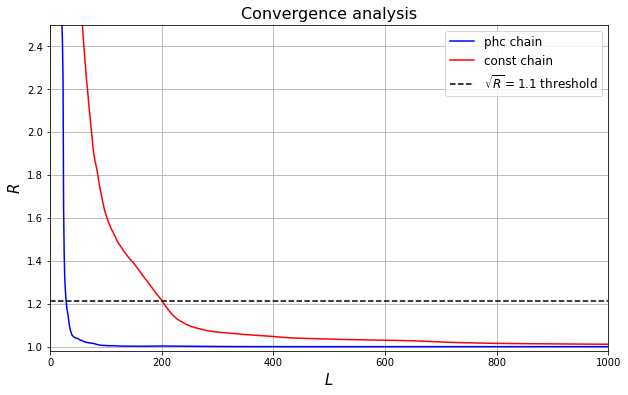

In [430]:
#we compare the convergence for 2 parameters
plt.figure(figsize=(10,6))
plt.plot(Ds, Rs4, label = 'phc chain', color='blue')
plt.plot(Ds, Rs5, label = 'const chain', color='red')
plt.plot(Ds, np.repeat(1.1**2, len(Ds)), label = '$\sqrt{R} = 1.1$ threshold', color = 'black', linestyle='--')
plt.xlabel('$L$', size=15)
plt.ylabel('$R$', size=15)
plt.legend(fontsize=12)
plt.ylim(0.98, 2.5)
plt.xlim(0, 1000)
plt.title('Convergence analysis', size = 16)
plt.grid()
plt.savefig('MH-Convergence.pdf')

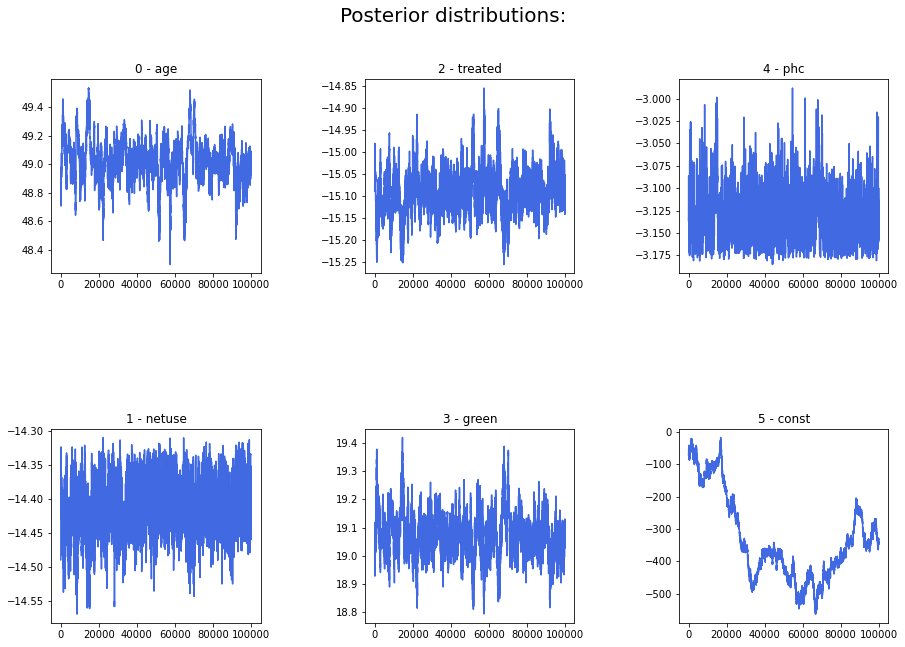

In [428]:
Beta_s = np.loadtxt('mhmc4.gz')
mc.Multiplot(Beta_s[:,:])
plt.savefig('multiplot.pdf')

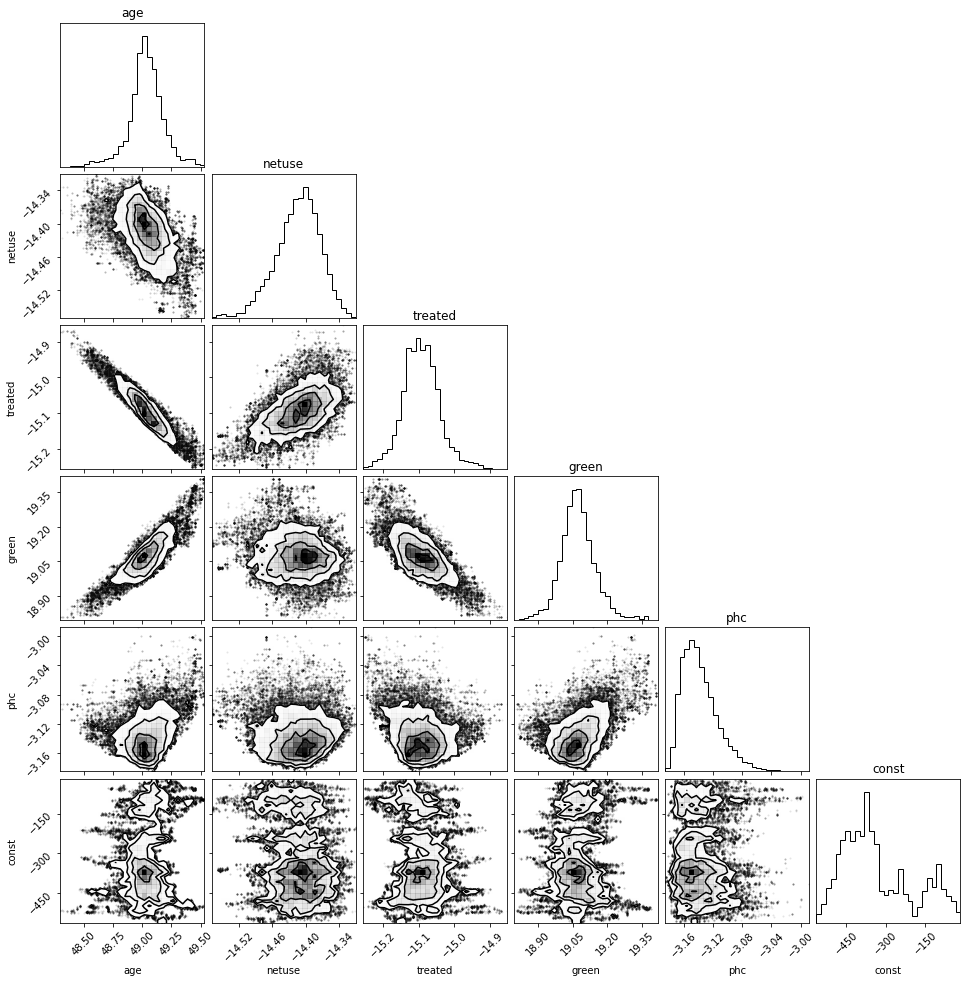

In [429]:
Beta_cut = np.array(Beta_s[:,:])
figure=corner.corner(Beta_cut, 
              show_titles=True, title_fmt=None, verbose=True,
                bins = 30, labels = ["age", "netuse", "treated", "green", "phc", "const"])
#plt.savefig('corner2.pdf')